# Identifying common team moves in football using statistical analysis

## Question or problem definition

We are given positional data of all 22 players and the ball on the football pitch. We intend to find out how the team adjusts itself to different contexts inside the game and use statistical analysis to identify such team moves in football

## Acquire training and testing data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
%matplotlib inline

data = pd.read_pickle('football/test_data_1.pkl')

## Wrangle, prepare and cleanse the data

The data contains multiple columns of sequences ('sequence_1' to 'sequence_18') of play from actual football games in which each players and the balls positions are recorded

Let us define the columns in the data based on available information: first 22 columns are X,Y positions of defensive players, second 22 columns are X,Y columns of offensive players, last 2 columns are X,Y position of the ball in play

In [2]:
columns = ['GKDef_X', 'GKDef_Y', 'Def1_X', 'Def1_Y','Def2_X', 'Def2_Y','Def3_X', 'Def3_Y','Def4_X', 'Def4_Y','Def5_X', 'Def5_Y', 'Def6_X', 'Def6_Y', 'Def7_X', 'Def7_Y','Def8_X', 'Def8_Y','Def9_X', 'Def9_Y','Def10_X', 'Def10_Y', 'GKAtt_X','GKAtt_Y','Att1_X','Att1_Y','Att2_X','Att2_Y','Att3_X','Att3_Y','Att4_X','Att4_Y','Att5_X','Att5_Y','Att6_X','Att6_Y','Att7_X','Att7_Y','Att8_X','Att8_Y','Att9_X','Att9_Y','Att10_X','Att10_Y','Ball_X','Ball_Y']

Lets make a DataFrame quickly and see where this goes.

In [3]:
test_sequence = 'sequence_1'
df = pd.DataFrame(data[test_sequence], columns = columns)
df.head(5)

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_X,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y
0,43.018059,1.379710,-13.374524,24.342030,15.370722,23.849276,8.483840,-10.150724,8.284221,15.078260,...,11.278517,8.08116,-5.489544,14.486957,4.890684,26.411594,0.499049,19.907248,-19.961977,3.843478
1,42.918251,1.379710,-13.274715,24.144928,15.071293,23.652174,8.284221,-10.150724,8.284221,14.881160,...,10.979088,8.08116,-5.589354,14.191304,4.990494,26.411594,0.399240,19.808697,-20.680607,3.863188
2,42.818443,1.379710,-13.274715,23.849276,14.672052,23.455074,7.984791,-10.249275,8.184410,14.486957,...,10.779468,8.08116,-5.788973,13.895652,5.090304,26.411594,0.399240,19.710144,-21.409222,3.892754
3,42.718632,1.379710,-13.274715,23.553623,14.272815,23.257971,7.785172,-10.249275,8.084601,14.191304,...,10.579848,8.08116,-5.988593,13.600000,5.190114,26.411594,0.299430,19.611595,-22.137833,3.922319
4,42.618820,1.281159,-13.174905,23.356522,13.973383,23.060869,7.585552,-10.249275,7.984791,13.895652,...,10.380228,8.08116,-6.088403,13.304348,5.289924,26.510145,0.199620,19.513042,-22.866446,3.951884


## Analyze, identify patterns, and explore the data.


### Displaying a sequence of play and showing movement of the ball

Let us the use the columns we designed above to convert the data into a DataFrame and display the trajectory of the ball for a test sequence

In [4]:
# Obtaining the positions occupied by the ball
ball_pos = df[['Ball_X','Ball_Y']].values.tolist()
ball_pos[0]

[-19.961977005004883, 3.843478202819824]

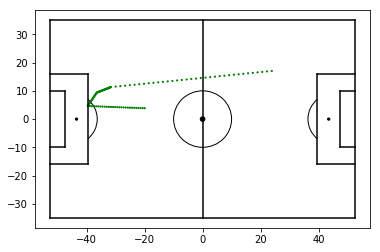

In [5]:
# Plotting the ball along with the position of the ball
# Run with createPitch([]) to just display the pitch
def createPitch(ball_pos, defense_pos, attack_pos):
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([-52.5,-52.5],[-35,35], color="black")
    plt.plot([-52.5,52.5],[35,35], color="black")
    plt.plot([52.5,52.5],[35,-35], color="black")
    plt.plot([52.5,-52.5],[-35,-35], color="black")
    plt.plot([0,0],[-35,35], color="black")
    
    #Left Penalty Area
    plt.plot([-39.5,-39.5],[16,-16],color="black")
    plt.plot([-52.5,-39.5],[16,16],color="black")
    plt.plot([-39.5,-52.5],[-16,-16],color="black")
    
    #Right Penalty Area
    plt.plot([39.5,39.5],[16,-16],color="black")
    plt.plot([52.5,39.5],[16,16],color="black")
    plt.plot([39.5,52.5],[-16,-16],color="black")
    
    #Left 6-yard Box
    plt.plot([-52.5,-47.5],[-10,-10],color="black")
    plt.plot([-47.5,-47.5],[-10,10],color="black")
    plt.plot([-52.5,-47.5],[10,10],color="black")
    
    #Right 6-yard Box
    plt.plot([52.5,47.5],[-10,-10],color="black")
    plt.plot([47.5,47.5],[-10,10],color="black")
    plt.plot([52.5,47.5],[10,10],color="black")
    
    #Create Arc and add it to our plot
    leftArc = patches.Arc((-45.5,0),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((45.5,0),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    
    #Assign circles to variables - do not fill the centre circle!
    centreCircle = plt.Circle((0,0),10,color="black",fill=False)
    centreSpot = plt.Circle((0,0),0.8,color="black")
    leftPenSpot = plt.Circle((-43.5,0),0.4, color="black")
    rightPenSpot = plt.Circle((43.5,0),0.4, color="black")
    
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Draw the circles to our plot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Plotting the ball
    for pos in attack_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="red")
        ax.add_patch(locBall)
    for pos in defense_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="blue")
        ax.add_patch(locBall)
    for pos in ball_pos:
        locBall = plt.Circle((pos[0],pos[1]),0.2,color="green")
        ax.add_patch(locBall)
    
        
createPitch(ball_pos, [], [])

### Visualizing a sequence of football play

Here we can create the dataframe with all the sequences available to us in order to build the DataFrame for our analysis and here we can see that the analysis is split by the number of sequences in the data, so here we are trying to combine it into a dataframe that outputs a sequences for all the players on the field and the ball. Here I'm trying to show the number of sequences in the data and what each sequence represents

In [6]:
positions = []
new_cols = columns + ['seq']
for seq in data:
    for d_seq in data[seq]:
        seq_list = d_seq.tolist()
        seq_list.append(seq)
        positions.append(seq_list)
df_data = pd.DataFrame(positions, columns = new_cols)
set(df_data['seq'])

{'sequence_1',
 'sequence_10',
 'sequence_11',
 'sequence_12',
 'sequence_13',
 'sequence_14',
 'sequence_15',
 'sequence_16',
 'sequence_17',
 'sequence_18',
 'sequence_19',
 'sequence_2',
 'sequence_20',
 'sequence_21',
 'sequence_22',
 'sequence_23',
 'sequence_24',
 'sequence_25',
 'sequence_26',
 'sequence_27',
 'sequence_28',
 'sequence_29',
 'sequence_3',
 'sequence_30',
 'sequence_31',
 'sequence_32',
 'sequence_33',
 'sequence_34',
 'sequence_35',
 'sequence_36',
 'sequence_37',
 'sequence_38',
 'sequence_4',
 'sequence_5',
 'sequence_6',
 'sequence_7',
 'sequence_8',
 'sequence_9'}

Here we split the dataframe into each of its sequences and make an list containing the DataFrames for each sequence called 'sequenced_data'

In [7]:
df_data.seq = df_data.seq.apply(lambda x: int(x.strip('sequence_')))
sequences = list(set(df_data.seq))
grp = df_data.groupby('seq')
sequenced_data = []
for sequence in sequences:
    sequenced_data.append(grp.get_group(sequence))
sequenced_data[0].head(5)

,GKDef_X,GKDef_Y,Def1_X,Def1_Y,Def2_X,Def2_Y,Def3_X,Def3_Y,Def4_X,Def4_Y,...,Att7_Y,Att8_X,Att8_Y,Att9_X,Att9_Y,Att10_X,Att10_Y,Ball_X,Ball_Y,seq
3162,43.018059,1.379710,-13.374524,24.342030,15.370722,23.849276,8.483840,-10.150724,8.284221,15.078260,...,8.08116,-5.489544,14.486957,4.890684,26.411594,0.499049,19.907248,-19.961977,3.843478,1
3163,42.918251,1.379710,-13.274715,24.144928,15.071293,23.652174,8.284221,-10.150724,8.284221,14.881160,...,8.08116,-5.589354,14.191304,4.990494,26.411594,0.399240,19.808697,-20.680607,3.863188,1
3164,42.818443,1.379710,-13.274715,23.849276,14.672052,23.455074,7.984791,-10.249275,8.184410,14.486957,...,8.08116,-5.788973,13.895652,5.090304,26.411594,0.399240,19.710144,-21.409222,3.892754,1
3165,42.718632,1.379710,-13.274715,23.553623,14.272815,23.257971,7.785172,-10.249275,8.084601,14.191304,...,8.08116,-5.988593,13.600000,5.190114,26.411594,0.299430,19.611595,-22.137833,3.922319,1
3166,42.618820,1.281159,-13.174905,23.356522,13.973383,23.060869,7.585552,-10.249275,7.984791,13.895652,...,8.08116,-6.088403,13.304348,5.289924,26.510145,0.199620,19.513042,-22.866446,3.951884,1


Trying to crunch the data into positions of players

In [8]:
def parse_data(data, seq):
    df = data[seq]
    defense = []
    attack = []
    ball = []
    defense.append(df[['GKDef_X','GKDef_Y']].values.tolist())
    defense.append(df[['Def1_X','Def1_Y']].values.tolist())
    defense.append(df[['Def2_X','Def2_Y']].values.tolist())
    defense.append(df[['Def3_X','Def3_Y']].values.tolist())
    defense.append(df[['Def4_X','Def4_Y']].values.tolist())
    defense.append(df[['Def5_X','Def5_Y']].values.tolist())
    defense.append(df[['Def6_X','Def6_Y']].values.tolist())
    defense.append(df[['Def7_X','Def7_Y']].values.tolist())
    defense.append(df[['Def8_X','Def8_Y']].values.tolist())
    defense.append(df[['Def9_X','Def9_Y']].values.tolist())
    defense.append(df[['Def10_X','Def10_Y']].values.tolist())
    attack.append(df[['GKAtt_X','GKAtt_Y']].values.tolist())
    attack.append(df[['Att1_X','Att1_Y']].values.tolist())
    attack.append(df[['Att2_X','Att2_Y']].values.tolist())
    attack.append(df[['Att3_X','Att3_Y']].values.tolist())
    attack.append(df[['Att4_X','Att4_Y']].values.tolist())
    attack.append(df[['Att5_X','Att5_Y']].values.tolist())
    attack.append(df[['Att6_X','Att6_Y']].values.tolist())
    attack.append(df[['Att7_X','Att7_Y']].values.tolist())
    attack.append(df[['Att8_X','Att8_Y']].values.tolist())
    attack.append(df[['Att9_X','Att9_Y']].values.tolist())
    attack.append(df[['Att10_X','Att10_Y']].values.tolist())
    ball = df[['Ball_X','Ball_Y']].values.tolist()
    def_list = []
    att_list = []
    for i in range (0,11):
        def_list = def_list + defense[i]
        att_list = att_list + attack[i]
        
    return def_list, att_list, ball

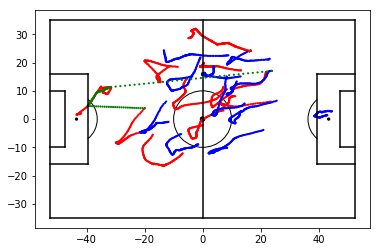

In [9]:
list_defense, list_attack, list_ball = parse_data(sequenced_data,0)
createPitch(list_ball, list_defense, list_attack)

Here we are visualizing a defender passing the ball back to the goalkeeper for a long kick, this looks like the dotted lines are indeed passes

### Analyzing the distance between defense and attack, ball and attack and between the defense and the ball for a sequence of play

Here we are visualizing an entire complex sequence of play which leads to a goal

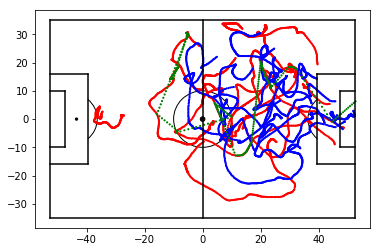

In [10]:
list_defense, list_attack, list_ball = parse_data(sequenced_data,1)
createPitch(list_ball, list_defense, list_attack)

In [11]:
len(list_defense), len(list_attack), len(list_ball), len(list_defense)/11, len(list_attack)/11

(3498, 3498, 318, 318.0, 318.0)

Now as we can see, the list_defense and list_attack lists have 318 positional markers for each player in the defense and attack respectively. And this 318 corresponds to a single sequence of play, which is 318 timesteps long

In [12]:
import math

def get_distances(defense, attack, ball):
    def_players = np.array_split(defense, 11)
    att_players = np.array_split(attack, 11)
    #print(len(def_players))
    #print(len(att_players))
    player_dist = []
    # i is corresponding to each player on each team 0 is GK
    for i in range(0,11):
        d = def_players[i]
        a = att_players[i]
        b = ball
        distances = []
        # j is corresponding to the sequence number
        for j in range(len(b)):
            #def_att_dist = math.sqrt(math.pow((d[j][0] - a[j][0]),2) + math.pow((d[j][1] - a[j][1]),2))
            def_ball_dist = math.sqrt(math.pow((d[j][0] - b[j][0]),2) + math.pow((d[j][1] - b[j][1]),2))
            att_ball_dist = math.sqrt(math.pow((a[j][0] - b[j][0]),2) + math.pow((a[j][1] - b[j][1]),2))
            distances.append((i, j, def_ball_dist, att_ball_dist))
        player_dist.append(distances)
    
    return player_dist

player_game_plot = get_distances(list_defense, list_attack, list_ball)
len(player_game_plot)

11

This plot is to show how similar players in different teams have similar patterns of movement with respect to the ball

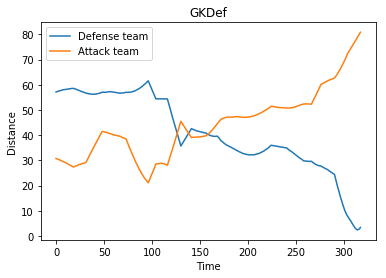

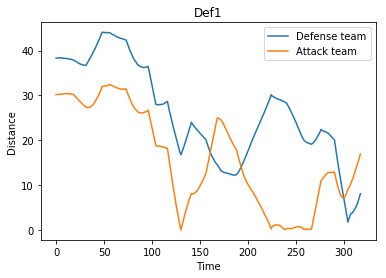

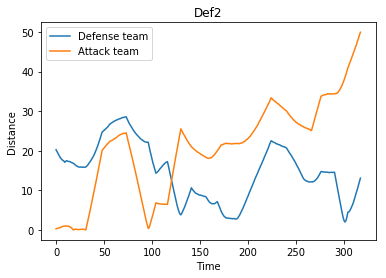

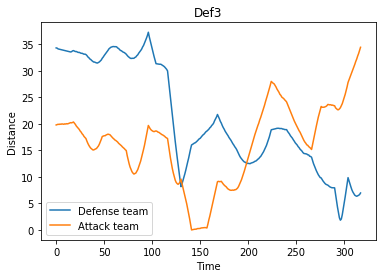

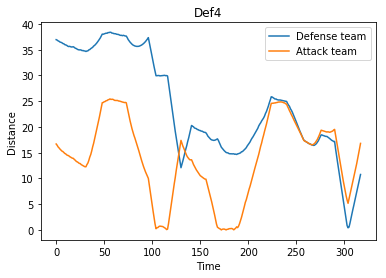

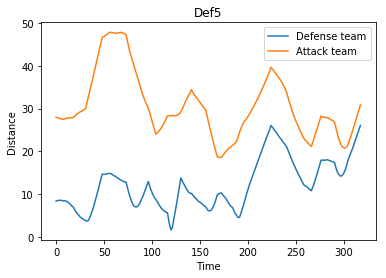

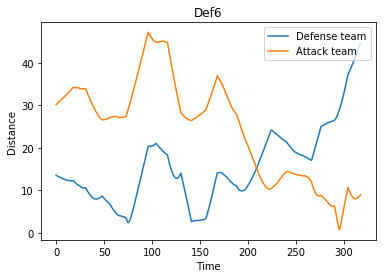

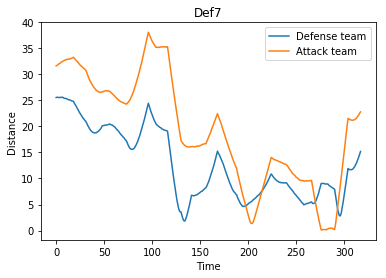

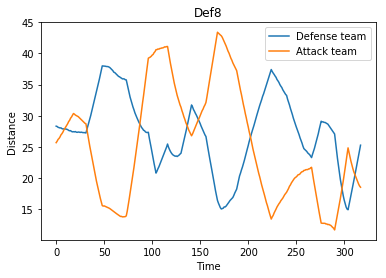

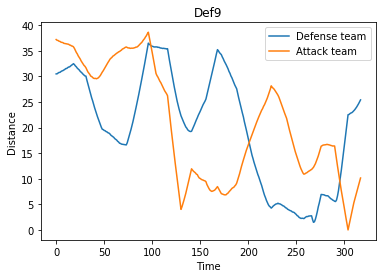

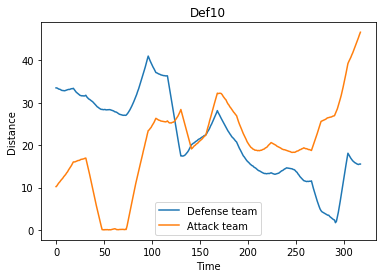

In [13]:
def plot_player_ball_dist(player_game_plot, i):
    player_df = pd.DataFrame(player_game_plot[i], columns = ['player', 'seq_num','def_ball','att_ball'])
    player_df = player_df.drop(['seq_num','player'],axis=1)
    #def_att = plt.plot(player_df['def_att'], label='def_att')
    def_ball = plt.plot(player_df['def_ball'], label='Defense team')
    att_ball = plt.plot(player_df['att_ball'], label='Attack team')
    #plt.legend(handles=[def_att, def_ball, att_ball])
    #print(columns[2*i].split('_')[0])
    plt.title(columns[2*i].split('_')[0])
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

for i in range(len(player_game_plot)):
    plot_player_ball_dist(player_game_plot,i)

### Possession

Let us find out how much each player possesses the ball from the attacking team.

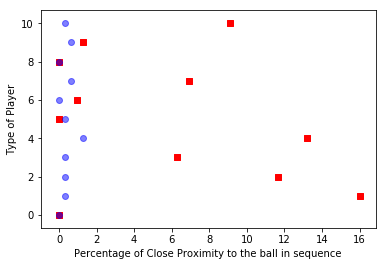

In [14]:
player_ppa = []
player_ppd = []
for i in range(0,11):
    player_df = pd.DataFrame(player_game_plot[i], columns = ['player', 'seq_num','def_ball','att_ball'])
    #player_df = player_df.drop(['seq_num','player'],axis=1)
    player_ppa.append((player_df[player_df['att_ball'] < 2].seq_num.count()/len(player_game_plot[i]))*100)
    player_ppd.append((player_df[player_df['def_ball'] < 2].seq_num.count()/len(player_game_plot[i]))*100)

# The attack team are red squares
plt.scatter(player_ppa, y=[i for i in range(11)], color='red', marker='s')
# The defense team are blue circles
plt.scatter(player_ppd, y=[i for i in range(11)], color='blue', marker='o', alpha=0.5)
plt.xlabel('Percentage of Close Proximity to the ball in sequence')
plt.ylabel('Type of Player')
plt.show()

In the plot above, the attacking team are red squares and defensive team are blue circles, you can see that the attacking team clearly dominated possession in this sequence.

## Finding out if a sequence is a goal 

In [15]:
def isGoal(sequence):
    seq = sequence[-1]
    #print(seq)
    if (((-39.5 < seq[0] < -52.5) or (39.5 < seq[0] < 52.5)) and ((-4 < seq[1] < 4))):
        return True
    else:
        return False
isGoal(list_ball)

False

Well this one seems to be a close miss, but are there any other goals in this data

In [16]:
for i in range(len(sequenced_data)):
    list_def, list_att, list_ball = parse_data(sequenced_data,i)
    print(isGoal(list_ball))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True


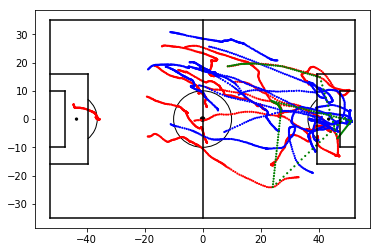

In [17]:
createPitch(list_ball, list_def, list_att)

Alright we can display the last one which looks like a True. Wow, a classic counterattack leading to a goal. So our function seems to work in finding a goal.

## Marking

Now lets try to find out how close the players of the defensive team are to the players in the attacking team in each sequence. Let us define a helper function dist to calculate the distance between two players of opposing teams.

In [18]:
def dist(x, y):
    return math.sqrt(math.pow((x[0] - y[0]),2) + math.pow((x[1] - y[1]),2))

In [19]:
def closestPlayerDist(defense, attack):
    def_players = np.array_split(defense, 11)
    att_players = np.array_split(attack, 11)
    #print(len(def_players))
    #print(len(att_players))
    #print(len(def_players[0]))
    #print(len(att_players[0]))
    distance = []
    # For each sequence time j
    for j in range(len(def_players[0])):
        # for each player on the defensive team k
        for k in range(11):
            # Add the distances of the players on the attacking team to the list
            player_dist = [dist(def_players[k][j], att_players[i][j]) for i in range(11)]
            distance.append([j,k,player_dist])
    
    distance = [(distance[i][0], distance[i][1], np.argmin(distance[i][2])) for i in range(len(distance))]
    return distance
    #print(list(zip(def_players, att_players)))

distances = closestPlayerDist(list_def, list_att)
distances[0:10]

[(0, 0, 9),
 (0, 1, 5),
 (0, 2, 10),
 (0, 3, 8),
 (0, 4, 4),
 (0, 5, 1),
 (0, 6, 1),
 (0, 7, 8),
 (0, 8, 9),
 (0, 9, 6)]

Here I am getting the percentage of time in the sequence of play each defensive player has marked a specific attacking player

In [20]:
marking = pd.DataFrame(distances, columns = ['time', 'player', 'att_player'])
marking = marking.groupby(['player','att_player']).count().sort_values(by='time', ascending=False)
marking.time = (marking.time/(len(distances)/11))*100
marking

,,time
player,att_player,
2,2,98.895028
5,1,97.237569
10,4,97.237569
6,1,87.845304
1,5,83.977901
3,1,59.116022
7,8,55.801105
0,9,55.248619
4,5,50.276243


Here we have the defensive players that have consistently been in close proximity to only one attacking player through the sequence. This is probably due to marking because the defensive players have marked their opponent tightly.

Text(0,0.5,'Percentage of time marking amongst top defenders')

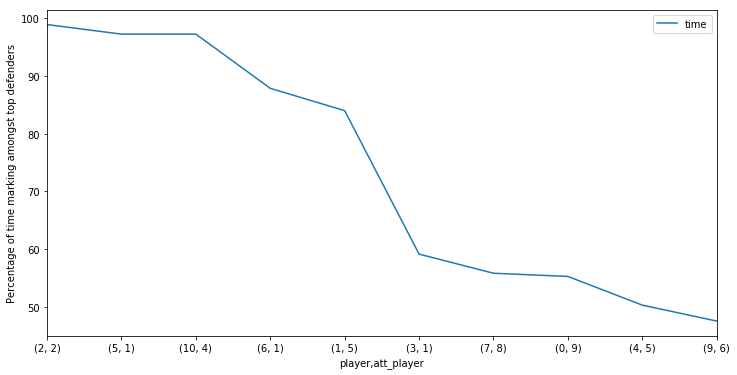

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
marking.head(10).plot()
plt.ylabel('Percentage of time marking amongst top defenders')

There are some players who seem to be marking their players very well, 2, 5, 10. This shows that throughout the sequence, these 3 players seem to have marked their players effectively but the rest of the team did not mark a specific player for too long. This could also be because of their position in the field but is not likely unless a player is at a odd position in the field. This seems to explain why the sequence ended up in a goal, because of poor marking on a classic counter-attack.